In [1]:
#Description: This program uses 170 Week Moving Average to determine when to buy and sell an asset

In [2]:
#Import the dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Read in the data
df = pd.read_csv('DOGEUSDT-1d-2020-2024.csv')
df['date'] = pd.to_datetime(df['open_time'], unit = 'ms')
#Show the data
df

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,date
0,1594339200000,0.003989,0.003989,0.003340,0.003535,7578204800,1594425599999,2.785203e+07,168920,3846820083,1.416088e+07,0,2020-07-10
1,1594425600000,0.003535,0.003960,0.003411,0.003812,6154154959,1594511999999,2.274044e+07,109150,2937547947,1.086980e+07,0,2020-07-11
2,1594512000000,0.003810,0.003861,0.003573,0.003648,2832682740,1594598399999,1.050230e+07,60981,1313945531,4.877211e+06,0,2020-07-12
3,1594598400000,0.003647,0.003660,0.002942,0.003159,7754495522,1594684799999,2.547336e+07,141223,3391720999,1.113695e+07,0,2020-07-13
4,1594684800000,0.003159,0.003401,0.003014,0.003293,4978543051,1594771199999,1.595989e+07,110355,2390883910,7.678383e+06,0,2020-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1714089600000,0.151240,0.151710,0.146740,0.147920,3867778223,1714175999999,5.780282e+08,1145146,1855613094,2.773404e+08,0,2024-04-26
1387,1714176000000,0.147910,0.149650,0.141450,0.147670,4145421485,1714262399999,6.048214e+08,1210326,2000949495,2.920275e+08,0,2024-04-27
1388,1714262400000,0.147670,0.151060,0.145880,0.146590,2886931954,1714348799999,4.306627e+08,864976,1400922850,2.090880e+08,0,2024-04-28
1389,1714348800000,0.146590,0.148030,0.139430,0.143340,5254723100,1714435199999,7.486186e+08,1447022,2535138288,3.611173e+08,0,2024-04-29


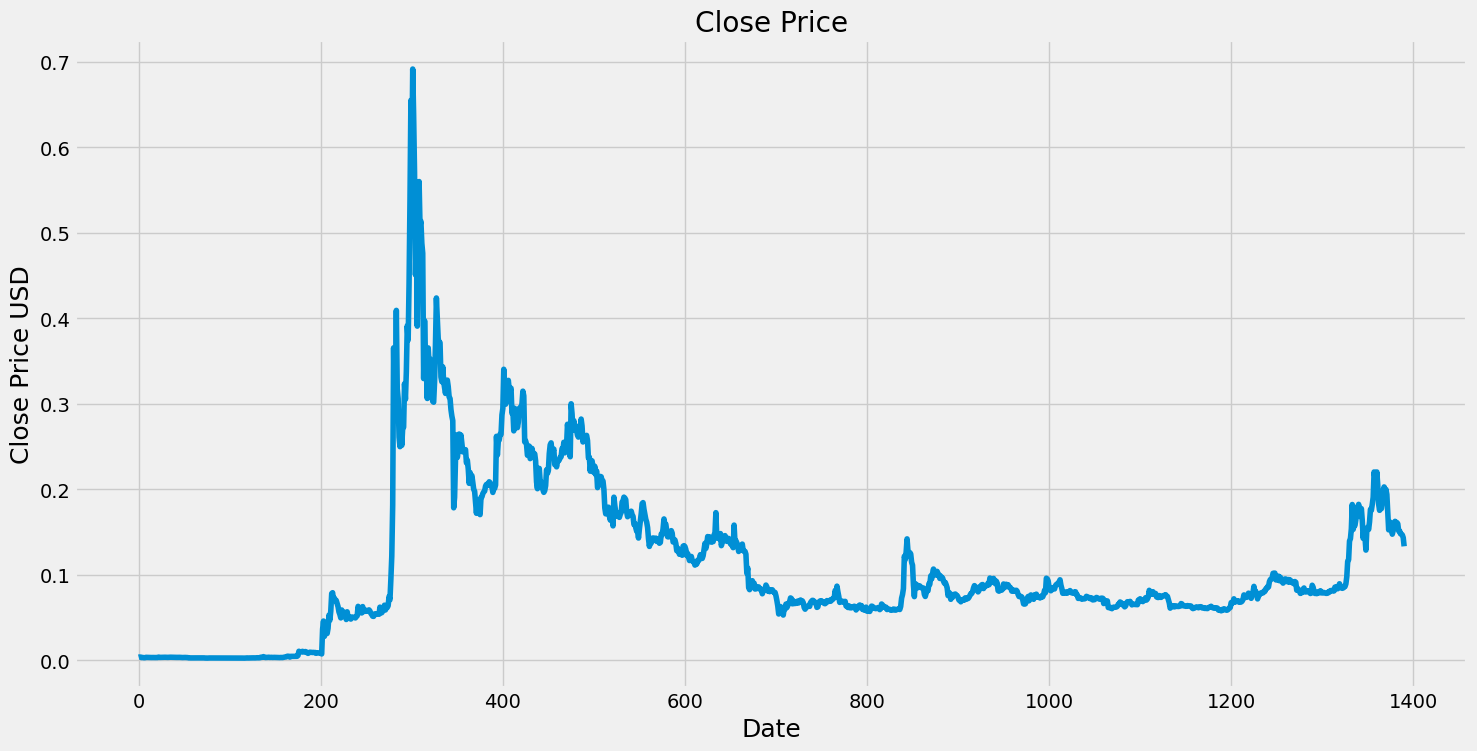

In [4]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [5]:
#Create a function to calculate the simple moving average
def SMA(data, period=1190, column='close'):
    return data[column].rolling(window=period).mean()

In [6]:
#Create a new column to store the 170 week or 1190 day Simple Moving Average (SMA)
df['170WMA'] = SMA(df, period=1190)

In [7]:
#Create the strategy
#Buy when the 170 WMA goes below the close price
#Sell when the 170 WMA goes above the close price
#Never sell at the price that is lower than you bought
def strategy(df):
    buy = [] #Empty buy list
    sell = [] #Empty sell list
    flag = 0 #Flag is used to indicate if we last bought or sold an asset
    buy_price = 0 #Place holder for the last buy price
    buy_cnt = 0 #Get the number of times that the asset was bought
    sell_cnt = 0 #Get the number of times the assset was sold

    #Create a loop to go through the data
    for i in range(0, len(df)):

        #If the 170WMA crosses above the current close price and the flag indicated its okay to buy (meaning flag = 0)
        if df['170WMA'][i] > df['close'][i] and flag == 0:
            #Append the close price to the buy list
            buy.append(df['close'][i])
            #Append a nan value for the sell list
            sell.append(np.nan)
            #Get the current price to buy to compare later with the sell price to make sure that we sell at a price higher than we bought
            buy_price = df['close'][i]
            #Set the flag to one to indicate a buy
            flag = 1
            #Add a 1 to the buy count
            buy_cnt = buy_cnt + 1
        #Else if the 170WMA crosses below the current close price and the flag indicates its okay to sell (meaning flag = 1) and the last buy price is below the current close price then sell
        elif df['170WMA'][i] < df['close'][i] and flag == 1 and buy_price < df['close'][i]:
            #Append the close price to the sell list
            sell.append(df['close'][i])
            #Append a nan value to the buy list:
            buy.append(np.nan)
            #Reset the buy price
            buy_price = 0
            #Reset the flag to 0 to indicate a sell
            flag = 0
            #Add 1 to the sell count
            sell_cnt = sell_cnt + 1
        else:
            sell.append(np.nan)
            buy.append(np.nan)
    #Return the buy and sell price and counts
    return (buy, sell, buy_cnt, sell_cnt)

In [8]:
#Get the buy and sell signals
df['buy'] = strategy(df)[0]
df['sell'] = strategy(df)[1]
#Get the number of times the asset was bought and sold (this be use to see if there was an extra buy)
number_buys = strategy(df)[2]
number_sells = strategy(df)[3]

In [9]:
#Get the last buy price
import math
#Create a variable to store the last buy price
last_buy_price = 0
#If the number of buys are greater than the number of sells then there was one buy that didnt get sold
if number_buys > number_sells:
    for i in range(0, len(df)):
        if math.isnan(df['buy'][i]) == False:
            last_buy_price = df['buy'][i]

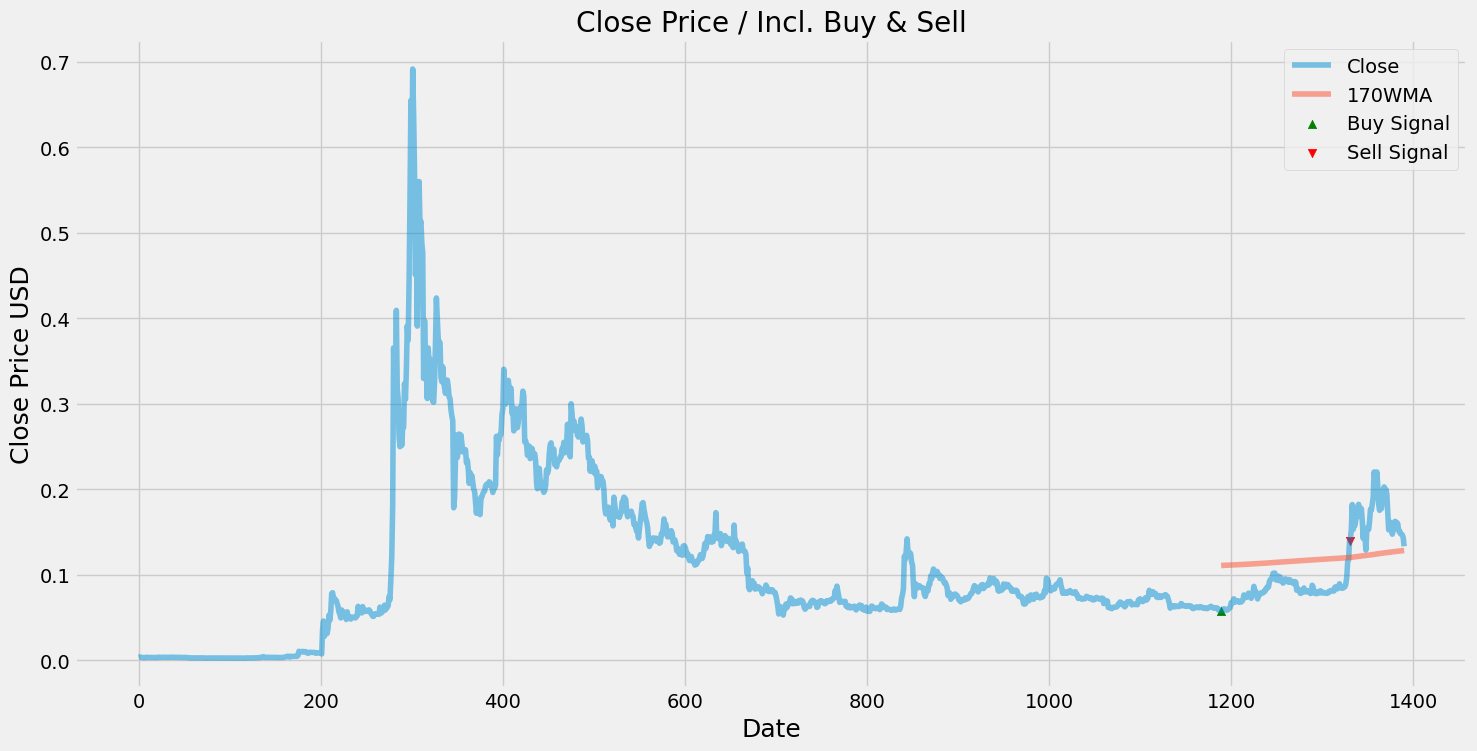

In [10]:
#Visualize the close price, the buy signal and the sell signal and the 170WMA
plt.figure(figsize=(16,8))
plt.title('Close Price / Incl. Buy & Sell')
plt.plot(df['close'], alpha=0.5, label = 'Close')
plt.plot(df['170WMA'], alpha=0.5, label = '170WMA')
plt.scatter(df.index, df['buy'], color = 'green', label = 'Buy Signal', marker='^', alpha=1)
plt.scatter(df.index, df['sell'], color = 'red', label = 'Sell Signal', marker='v', alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.legend()
plt.show()

In [11]:
#Get and show the returns from buying and selling
df['sell'].sum() - df['buy'].sum() - last_buy_price

0.08167999999999999

In [12]:
#Get and show the returns from a buy and hold strategy starting at the same time as the 170 week moving average
df['close'][len(df) - 1] - df['close'][1189]

0.07544

In [13]:
#Hence with our strategy we earn more $